<a href="https://colab.research.google.com/github/mansoorshaik049/Loan-Prediction-Based-on-Customer-Behavior/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
modell= LogisticRegression()

from sklearn.metrics import confusion_matrix

from sklearn import tree
modeld=tree.DecisionTreeClassifier()

from sklearn.svm import SVC
models=SVC()

from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()

from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
modelg=GaussianNB()

from sklearn.naive_bayes import MultinomialNB
modelm=MultinomialNB()

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv("/content/Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# READING THE FILE AND CHECKING FOR NULL DATA 

In [3]:
df.shape

(252000, 13)

In [4]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# PRIMARY DATA ANALYSIS AND GRAPHS FOR BETTER UNDERSTANDING OF THE GIVEN DATA 

In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
df.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

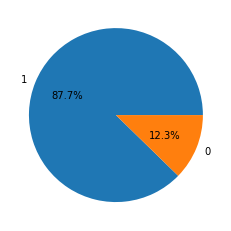

In [9]:
plt.pie(df.Risk_Flag.value_counts(),autopct='%1.1f%%', labels=['1','0'])
plt.show()

MOST OF THE DATA IS CONTAINS RISK_FLAG =1 WHICH MAY CAUSE A PROBLEM DURING PREDICTIONS

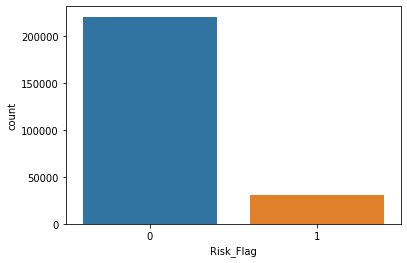

In [10]:
sns.countplot(x="Risk_Flag", data=df)

In [11]:
p=df.groupby('Risk_Flag')['Risk_Flag'].count()

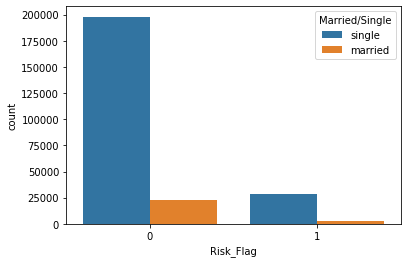

In [12]:
sns.countplot(x="Risk_Flag", hue="Married/Single",data=df)

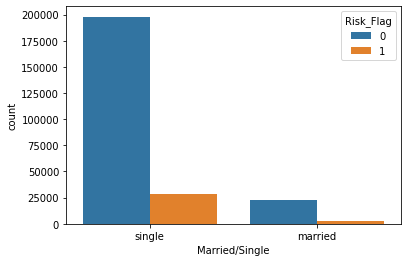

In [13]:
sns.countplot(x="Married/Single", hue="Risk_Flag",data=df)

In [14]:
marital_status_risk_flag = pd.crosstab( df["Risk_Flag"], df["Married/Single"],normalize='index')
marital_status_risk_flag

Married/Single,married,single
Risk_Flag,,
0,0.104487,0.895513
1,0.085043,0.914957


WE CAN SAY THAT AMONG THE PEOPLE WITH RISKFLAG THERE IS 91% CHANCE THAT HE IS A SINGLE

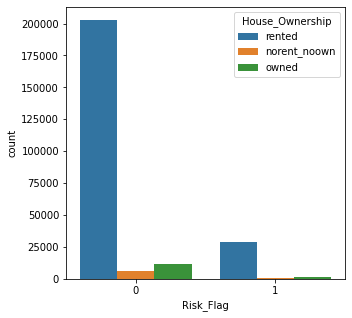

In [15]:
plt.figure(figsize=(5,5)) 
sns.countplot(x="Risk_Flag", hue="House_Ownership",data=df)

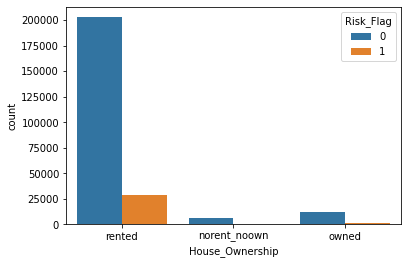

In [16]:
sns.countplot(hue="Risk_Flag", x="House_Ownership",data=df)

In [17]:
house_status_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"], normalize='index',margins=True)
house_status_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,0.900473,0.099527
owned,0.910203,0.089797
rented,0.874423,0.125577
All,0.877000,0.123000


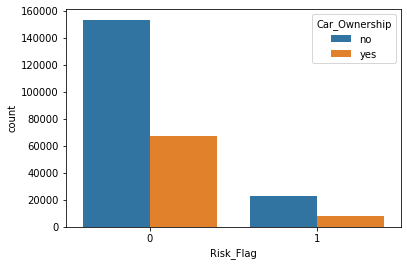

In [18]:
sns.countplot(x="Risk_Flag", hue="Car_Ownership",data=df)

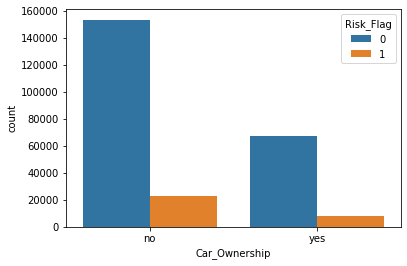

In [19]:
sns.countplot(hue="Risk_Flag", x="Car_Ownership",data=df)

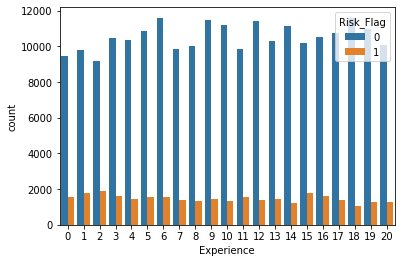

In [20]:
sns.countplot(hue="Risk_Flag", x="Experience",data=df,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


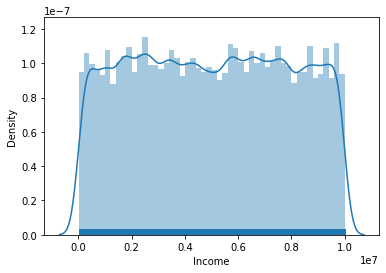

In [21]:
sns.distplot(a=df.Income,  rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


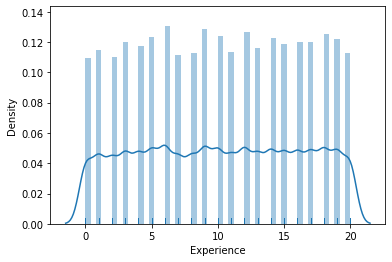

In [22]:
sns.distplot(a=df.Experience,  rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


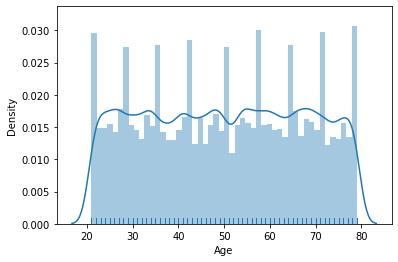

In [23]:
sns.distplot(a=df.Age,  rug=True)

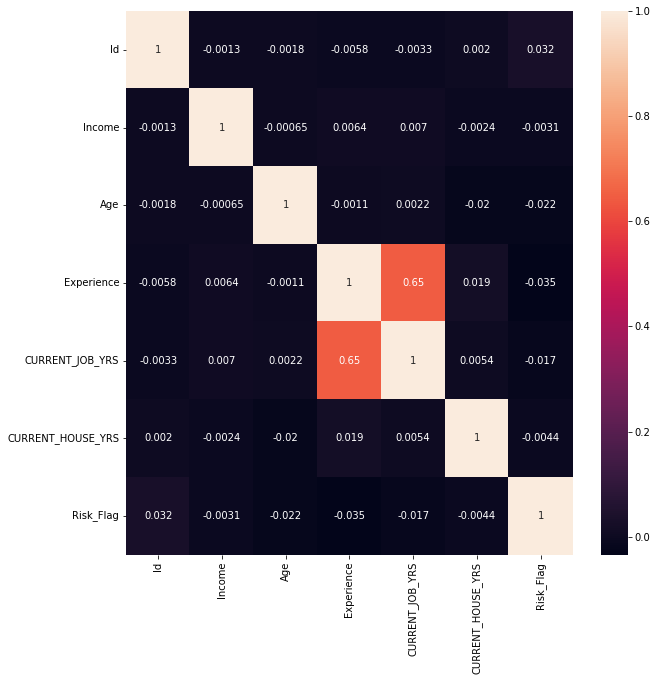

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

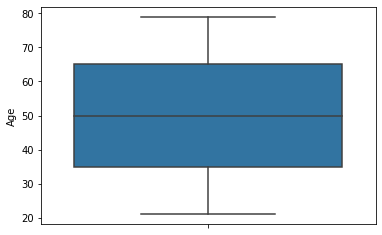

In [25]:
sns.boxplot(y=df.Age, data=df)

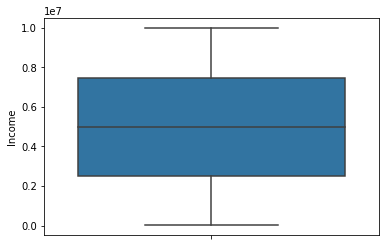

In [26]:
sns.boxplot(y=df.Income, data=df)

# SUMMARY 

1.   Data contains 87% risk flags=1 which is heavily skewed
2.   There are no outliers
3.   corelation plot shows that experience and current job years have good corelation and we can exclude one of them during model predition
4.   3 columns martial status , houseand car ownership can be encoded to convert the categorical to number data




# ML PREDICTION MODEL 

In [27]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [28]:
y=df.Risk_Flag

In [29]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [30]:
df=df.drop(['Id','CITY','Profession'], axis='columns')


In [31]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Puducherry,0,10,0


# SCALING THE AGE EXPERIENCE CURRENT JOB, HOUSE COLUMNS FOR BETTER RESULTS


In [32]:
scaler=MinMaxScaler()
scaler.fit(df[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])
df[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]=scaler.transform(df[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

In [33]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,single,rented,no,Madhya_Pradesh,0.214286,0.75,0
1,0.757206,0.327586,0.50,single,rented,no,Maharashtra,0.642857,0.75,0
2,0.398564,0.775862,0.20,married,rented,no,Kerala,0.285714,0.00,0
3,0.625263,0.344828,0.10,single,rented,yes,Odisha,0.142857,0.50,1
4,0.576454,0.448276,0.55,single,rented,no,Tamil_Nadu,0.214286,1.00,1
...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,single,rented,no,West_Bengal,0.428571,0.25,0
251996,0.283620,0.086207,0.50,single,rented,no,Madhya_Pradesh,0.428571,0.25,0
251997,0.451682,0.431034,0.35,single,rented,no,Maharashtra,0.500000,0.50,0
251998,0.650356,0.413793,0.00,single,rented,no,Puducherry,0.000000,0.00,0


In [34]:
x=df.drop(['Risk_Flag'], axis=1)
x

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.129487,0.034483,0.15,single,rented,no,Madhya_Pradesh,0.214286,0.75
1,0.757206,0.327586,0.50,single,rented,no,Maharashtra,0.642857,0.75
2,0.398564,0.775862,0.20,married,rented,no,Kerala,0.285714,0.00
3,0.625263,0.344828,0.10,single,rented,yes,Odisha,0.142857,0.50
4,0.576454,0.448276,0.55,single,rented,no,Tamil_Nadu,0.214286,1.00
...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,single,rented,no,West_Bengal,0.428571,0.25
251996,0.283620,0.086207,0.50,single,rented,no,Madhya_Pradesh,0.428571,0.25
251997,0.451682,0.431034,0.35,single,rented,no,Maharashtra,0.500000,0.50
251998,0.650356,0.413793,0.00,single,rented,no,Puducherry,0.000000,0.00


In [35]:
y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

# Reading the test dataset

In [36]:
dt=pd.read_csv("/content/Test Data.csv")
dt

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [37]:
dt.STATE.unique()

array(['West Bengal', 'Maharashtra', 'Jharkhand', 'Tamil Nadu', 'Haryana',
       'Gujarat', 'Andhra Pradesh', 'Bihar', 'Madhya Pradesh',
       'Chhattisgarh', 'Assam', 'Uttar Pradesh', 'Karnataka', 'Rajasthan',
       'Telangana', 'Uttar Pradesh[5]', 'Jammu and Kashmir', 'Odisha',
       'Uttarakhand', 'Punjab', 'Puducherry', 'Himachal Pradesh',
       'Chandigarh', 'Mizoram', 'Tripura', 'Delhi', 'Kerala', 'Sikkim',
       'Manipur'], dtype=object)

In [38]:
dt.STATE = dt.STATE.str.replace(' ','_')

In [39]:
dt.STATE.unique()

array(['West_Bengal', 'Maharashtra', 'Jharkhand', 'Tamil_Nadu', 'Haryana',
       'Gujarat', 'Andhra_Pradesh', 'Bihar', 'Madhya_Pradesh',
       'Chhattisgarh', 'Assam', 'Uttar_Pradesh', 'Karnataka', 'Rajasthan',
       'Telangana', 'Uttar_Pradesh[5]', 'Jammu_and_Kashmir', 'Odisha',
       'Uttarakhand', 'Punjab', 'Puducherry', 'Himachal_Pradesh',
       'Chandigarh', 'Mizoram', 'Tripura', 'Delhi', 'Kerala', 'Sikkim',
       'Manipur'], dtype=object)

In [40]:

xt=dt.drop(['ID','CITY','Profession'], axis='columns')
xt.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,West_Bengal,4,13
1,1215004,25,5,single,rented,no,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Maharashtra,3,12
4,13429,25,18,single,rented,yes,West_Bengal,13,11


In [41]:
xt=pd.get_dummies(data=xt, columns= ["Married/Single","House_Ownership","Car_Ownership","STATE"], drop_first=True)

In [42]:
xt

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,STATE_Assam,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,7393090,59,19,4,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1215004,25,5,5,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8901342,50,12,9,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1944421,49,9,3,12,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,13429,25,18,13,11,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,5,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,2917765,47,9,9,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,8082415,24,5,4,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,9474180,51,13,13,14,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
xt[['Income','Age','Experience', 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]=scaler.transform(xt[['Income','Age','Experience' ,'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']])

In [44]:
xt

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,STATE_Assam,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0.739045,0.655172,0.95,0.285714,0.75,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.120594,0.068966,0.25,0.357143,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.890026,0.500000,0.60,0.642857,1.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.193612,0.482759,0.45,0.214286,0.50,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000312,0.068966,0.90,0.928571,0.25,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.995550,0.620690,0.65,0.357143,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0.291047,0.448276,0.45,0.642857,1.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0.808049,0.051724,0.25,0.285714,0.75,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0.947370,0.517241,0.65,0.928571,1.00,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
dy=pd.read_csv("/content/Sample Prediction Dataset.csv")
dy

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,1
27997,27998,0
27998,27999,0


In [46]:
yt=dy.drop('id', axis='columns')
yt

,risk_flag
0,0
1,0
2,1
3,0
4,0
...,...
27995,0
27996,1
27997,0
27998,0


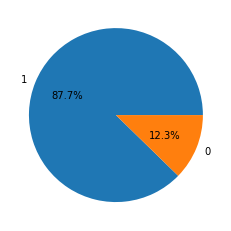

In [47]:
plt.pie(df.Risk_Flag.value_counts(),autopct='%1.1f%%', labels=['1','0'])
plt.show()

As represented in the above piechart the data is imbalanced and to solve this we can use oversampling or undersampling techniques

## SMOTE

In [48]:
x_smote=pd.get_dummies(data=x, columns= ["Married/Single","House_Ownership","Car_Ownership","STATE"], drop_first=True)

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 50, k_neighbors=90)
x_train_res, y_train_res = sm.fit_resample(x_smote, y.ravel())

In [50]:
x_train_res

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,STATE_Assam,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0.129487,0.034483,0.150000,0.214286,0.750000,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.757206,0.327586,0.500000,0.642857,0.750000,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.398564,0.775862,0.200000,0.285714,0.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.625263,0.344828,0.100000,0.142857,0.500000,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.576454,0.448276,0.550000,0.214286,1.000000,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,0.206719,0.266300,0.456570,0.404071,0.282850,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
442004,0.464654,0.458830,0.429595,0.399904,0.899663,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
442005,0.468481,0.558726,0.144673,0.183469,0.479694,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
442006,0.357100,0.148967,0.761998,0.294284,0.000000,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## SMOTENC For Categorical values

In [51]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[3,4,5,6], random_state=0)
x_smotenc, y_smotenc = smote_nc.fit_resample(x, y)

In [52]:
#x_train_res
x_smotenc

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.129487,0.034483,0.150000,single,rented,no,Madhya_Pradesh,0.214286,0.75
1,0.757206,0.327586,0.500000,single,rented,no,Maharashtra,0.642857,0.75
2,0.398564,0.775862,0.200000,married,rented,no,Kerala,0.285714,0.00
3,0.625263,0.344828,0.100000,single,rented,yes,Odisha,0.142857,0.50
4,0.576454,0.448276,0.550000,single,rented,no,Tamil_Nadu,0.214286,1.00
...,...,...,...,...,...,...,...,...,...
442003,0.860995,0.595298,0.447272,single,rented,no,Telangana,0.638959,0.50
442004,0.994518,0.706897,0.200000,single,rented,no,Bihar,0.285714,0.00
442005,0.950222,0.848406,0.285063,single,rented,yes,Tamil_Nadu,0.357143,0.50
442006,0.164884,0.258621,0.350000,single,rented,yes,Chhattisgarh,0.500000,0.75


In [53]:
x_smotenc=pd.get_dummies(data=x_smotenc, columns= ["Married/Single","House_Ownership","Car_Ownership","STATE"], drop_first=True)

In [54]:
x_smotenc

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,STATE_Assam,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0.129487,0.034483,0.150000,0.214286,0.75,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.757206,0.327586,0.500000,0.642857,0.75,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.398564,0.775862,0.200000,0.285714,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.625263,0.344828,0.100000,0.142857,0.50,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.576454,0.448276,0.550000,0.214286,1.00,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442003,0.860995,0.595298,0.447272,0.638959,0.50,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
442004,0.994518,0.706897,0.200000,0.285714,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
442005,0.950222,0.848406,0.285063,0.357143,0.50,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
442006,0.164884,0.258621,0.350000,0.500000,0.75,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Undersampling

In [57]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=20, replacement=True, sampling_strategy=1)
x_resampled_u, y_resampled_u = rus.fit_resample(x, y)


In [58]:
x_resampled_u=pd.get_dummies(data=x_resampled_u, columns= ["Married/Single","House_Ownership","Car_Ownership","STATE"], drop_first=True)

In [59]:
x_resampled_u

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,STATE_Assam,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0.090578,0.500000,0.20,0.285714,0.75,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.219616,0.189655,0.85,0.500000,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.182363,0.724138,0.70,0.500000,1.00,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.306962,0.810345,0.95,0.714286,1.00,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.911603,0.913793,0.90,0.500000,0.75,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61987,0.123559,0.241379,0.75,0.214286,0.25,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
61988,0.132167,0.724138,0.95,0.928571,0.50,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61989,0.178826,0.448276,0.10,0.142857,0.50,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61990,0.317527,0.534483,0.10,0.142857,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## NEARMISS

In [60]:
x_resampled_nm1=pd.get_dummies(data=x, columns= ["Married/Single","House_Ownership","Car_Ownership","STATE"], drop_first=True)

In [61]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1, n_neighbors=30, sampling_strategy=0.28)
x_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(x_resampled_nm1, y)

In [62]:
x_resampled_nm1

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,STATE_Assam,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0.791193,0.034483,0.10,0.142857,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000037,0.034483,0.05,0.071429,1.00,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.000037,0.034483,0.05,0.071429,1.00,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.000037,0.034483,0.05,0.071429,1.00,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.546402,0.155172,0.10,0.142857,1.00,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141690,0.123559,0.241379,0.75,0.214286,0.25,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
141691,0.132167,0.724138,0.95,0.928571,0.50,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
141692,0.178826,0.448276,0.10,0.142857,0.50,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
141693,0.317527,0.534483,0.10,0.142857,0.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# HYPER PARAMETER TUNING

In [63]:
model_params={
   
    'random_forest':{
        'model' : modelr ,
        'params' : {
            'n_estimators' :[5,10,20],
            'criterion': ['entropy', 'gini']
        }       
    },
    
    'tree':{
        'model' : modeld ,
        'params' : {
            'criterion': ['entropy', 'gini']
        }       
    },
    'log_reg':{
        'model' : modell ,
        'params' : {
            'C' : [1,10,20],
        }       
    },
    'naive_bayes_gaussian': {
        'model': modelg,
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': modelm,
        'params': {}
    },
    
    
}

In [ ]:
scores=[]
for model_name ,mp in model_params.items():
    clf=RandomizedSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False, n_iter=5)
    clf.fit(x_resampled_nm1, y_resampled_nm1)
    scores.append({
        'model': model_name ,
        'best_score' : clf.best_score_ ,
        'best_param' : clf.best_params_
    })

In [65]:
scores

[{'model': 'random_forest',
  'best_score': 0.7064477980307803,
  'best_param': {'n_estimators': 20, 'criterion': 'gini'}},
 {'model': 'tree',
  'best_score': 0.6210887501074167,
  'best_param': {'criterion': 'entropy'}},
 {'model': 'log_reg',
  'best_score': 0.7935778038279331,
  'best_param': {'C': 20}},
 {'model': 'naive_bayes_gaussian',
  'best_score': 0.7814459961179957,
  'best_param': {}},
 {'model': 'naive_bayes_multinomial',
  'best_score': 0.7884047050080141,
  'best_param': {}}]

In [66]:
ds=pd.DataFrame(scores, columns=['model','best_score','best_param'])
ds

,model,best_score,best_param
0,random_forest,0.706448,"{'n_estimators': 20, 'criterion': 'gini'}"
1,tree,0.621089,{'criterion': 'entropy'}
2,log_reg,0.793578,{'C': 20}
3,naive_bayes_gaussian,0.781446,{}
4,naive_bayes_multinomial,0.788405,{}


BY USING HYPER PARAMETER TUNING THE BEST FUNCTION IS RANDOM FOREST WITH n_estimators=20 and criterion=gini






# Using the original data for prediction

In [67]:
x_simple=pd.get_dummies(data=x, columns= ["Married/Single","House_Ownership","Car_Ownership","STATE"], drop_first=True)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
model_random=RandomForestClassifier(criterion='entropy',n_estimators=10)
model_random.fit(x_simple, y )
prediction=model_random.predict(xt)
print(classification_report(yt, prediction))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     24407
           1       0.12      0.11      0.11      3593

    accuracy                           0.79     28000
   macro avg       0.50      0.50      0.50     28000
weighted avg       0.77      0.79      0.78     28000



Due to imbalaced data the accuracy may be high but the recall is very less . In our case recall is our main metric

# Using oversampled data for prediction

In [70]:
from sklearn.ensemble import RandomForestClassifier


model_random=RandomForestClassifier(criterion='entropy',n_estimators=10)
model_random.fit(x_train_res, y_train_res )
prediction=model_random.predict(xt)
print(classification_report(yt, prediction))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85     24407
           1       0.13      0.18      0.15      3593

    accuracy                           0.74     28000
   macro avg       0.50      0.50      0.50     28000
weighted avg       0.78      0.74      0.76     28000



In [71]:
model_random=RandomForestClassifier(criterion='entropy',n_estimators=10)
model_random.fit(x_smotenc, y_smotenc )
prediction=model_random.predict(xt)
print(classification_report(yt, prediction))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     24407
           1       0.13      0.19      0.15      3593

    accuracy                           0.73     28000
   macro avg       0.50      0.50      0.50     28000
weighted avg       0.78      0.73      0.75     28000



# Using undersampling data to predict 

In [72]:
model_random=RandomForestClassifier(criterion='entropy',n_estimators=10)
model_random.fit(x_resampled_u, y_resampled_u )
prediction=model_random.predict(xt)
print(classification_report(yt, prediction))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83     24407
           1       0.13      0.22      0.16      3593

    accuracy                           0.71     28000
   macro avg       0.50      0.50      0.49     28000
weighted avg       0.78      0.71      0.74     28000



In [76]:
model_random=RandomForestClassifier(criterion='gini',n_estimators=20)
model_random.fit(x_resampled_nm1, y_resampled_nm1 )
prediction_rf=model_random.predict(xt)
print(classification_report(yt, prediction_rf))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72     24407
           1       0.13      0.40      0.20      3593

    accuracy                           0.59     28000
   macro avg       0.50      0.51      0.46     28000
weighted avg       0.78      0.59      0.65     28000



In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yt, prediction_rf)

array([[15034,  9373],
       [ 2141,  1452]])

Nearmiss technique ha improved the recall of the prediction by 400%

Here we are more interested in recall as it deals with FalseNegetive which in our case is "predicted as zero but actual is 1" which means that if this false negetive incresed then we are leaving the people who should not be eligible for loan as eligigible which is type 2 error and this should be our main concern